In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
from autogluon.tabular import TabularDataset, TabularPredictor

d:\Autogluon\Autogluon\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
Data = pd.read_csv('insurance.csv')
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
Data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

                 age        bmi  children       charges
region                                                 
northeast  39.268519  29.173503  1.046296  13406.384516
northwest  39.196923  29.199785  1.147692  12417.575374
southeast  38.939560  33.355989  1.049451  14735.411438
southwest  39.455385  30.596615  1.141538  12346.937377


C:\Users\aakas\AppData\Local\Temp\ipykernel_19996\3770037928.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_region = Data.groupby(by = "region").mean()
C:\Users\aakas\AppData\Local\Temp\ipykernel_19996\3770037928.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(['northeast','northwest', 'southeast','southwest'],(Data.groupby(by = "region").mean())['charges'])


Text(0.5, 1.0, "Relationship between 'region' and 'charges'")

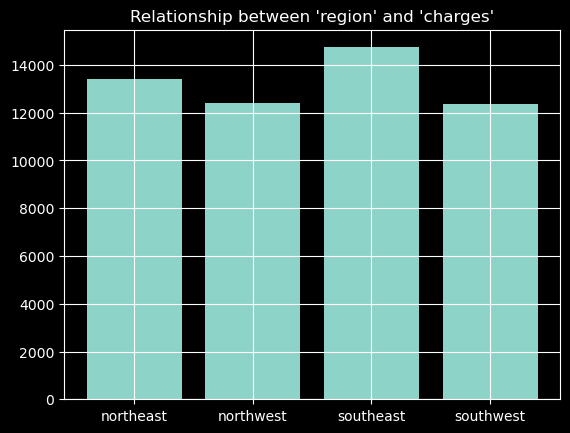

In [5]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index
df_region = Data.groupby(by = "region").mean()
print(df_region)
plt.style.use('dark_background')
plt.bar(['northeast','northwest', 'southeast','southwest'],(Data.groupby(by = "region").mean())['charges'])
plt.grid()
plt.title("Relationship between 'region' and 'charges'")

South East region has maximum Charges

C:\Users\aakas\AppData\Local\Temp\ipykernel_19996\4170310362.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_age = Data.groupby(by='age').mean()


Text(0.5, 1.0, "Relationship between 'age' and 'charges'")

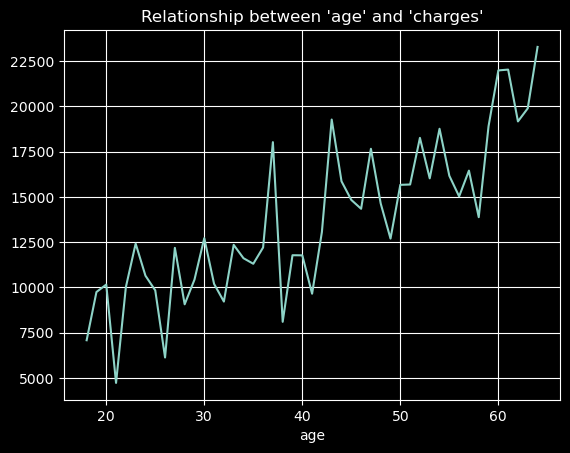

In [6]:
df_age = Data.groupby(by='age').mean()
#print(df_age)
df_age['charges'].plot(kind= "line")
plt.grid()
plt.title("Relationship between 'age' and 'charges'")

Charges is directly proportional to AGE

Null values in Data : 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


<Axes: >

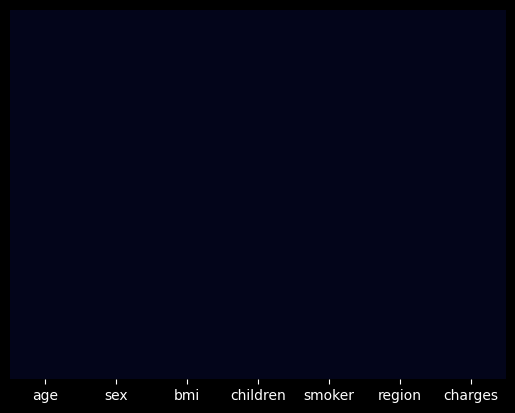

In [7]:
print(f"Null values in Data : \n{Data.isnull().sum()}")
sb.heatmap(Data.isnull(),yticklabels=False,cbar = False)

No null entries in Data

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

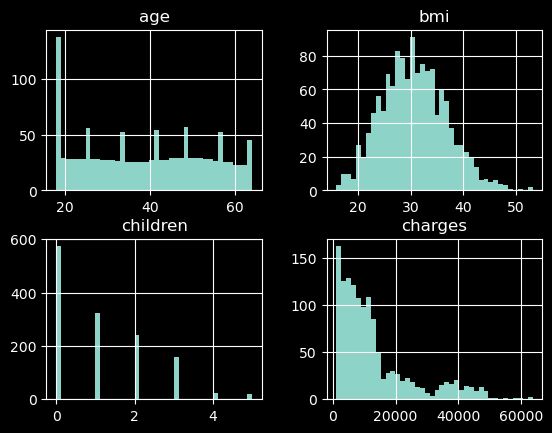

In [8]:
Data.hist(bins=40)

Relationship between all columns in Data

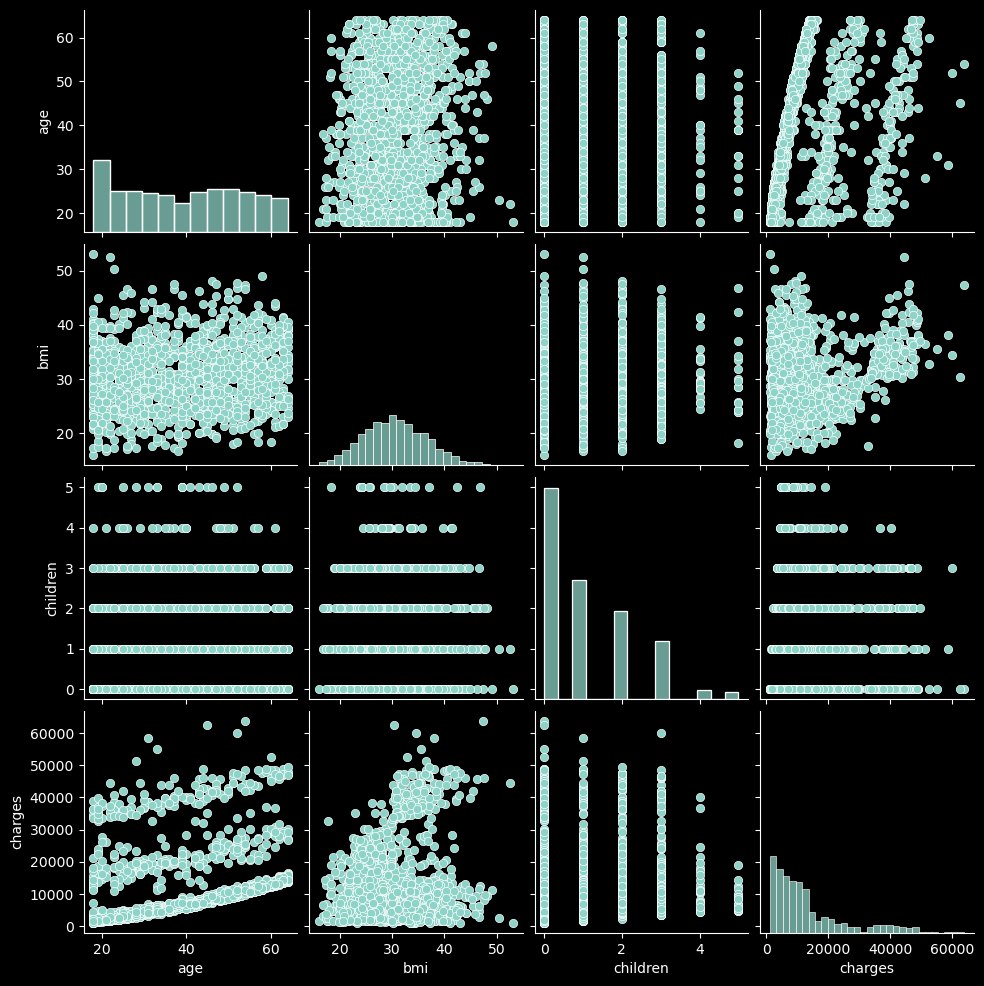

In [9]:
sb.pairplot(Data)

In [10]:
def reg_plot(element):
    plt.figure(figsize=(15,6))
    sb.regplot(x=element,y='charges',data = Data)
    plt.title(f"Regression plot for charges with {element} column")

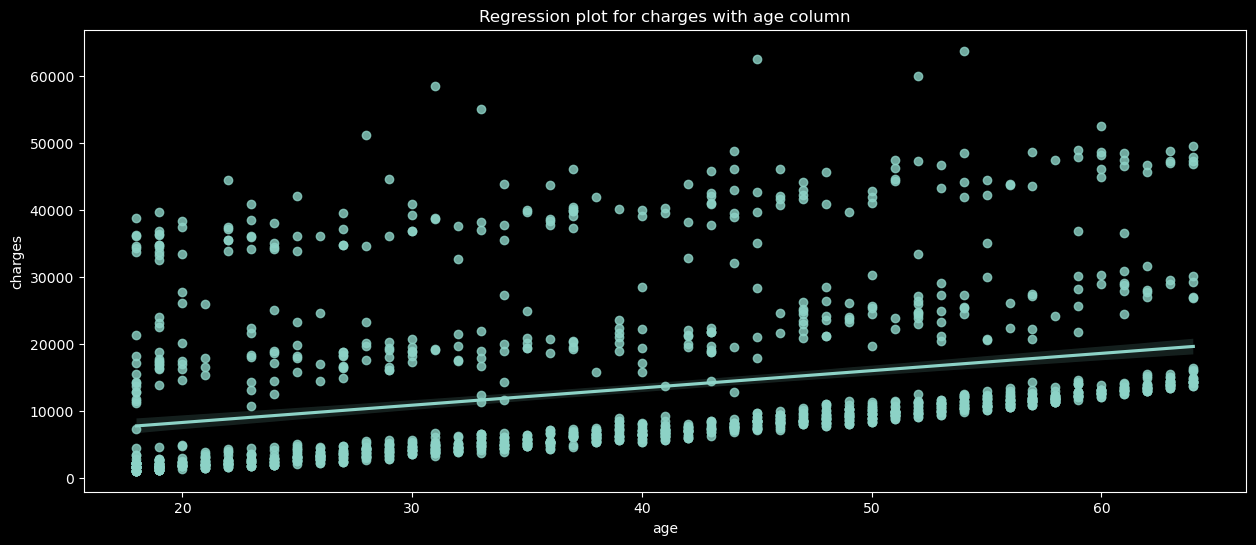

In [11]:
# Regression plot for charges with age column
reg_plot('age')

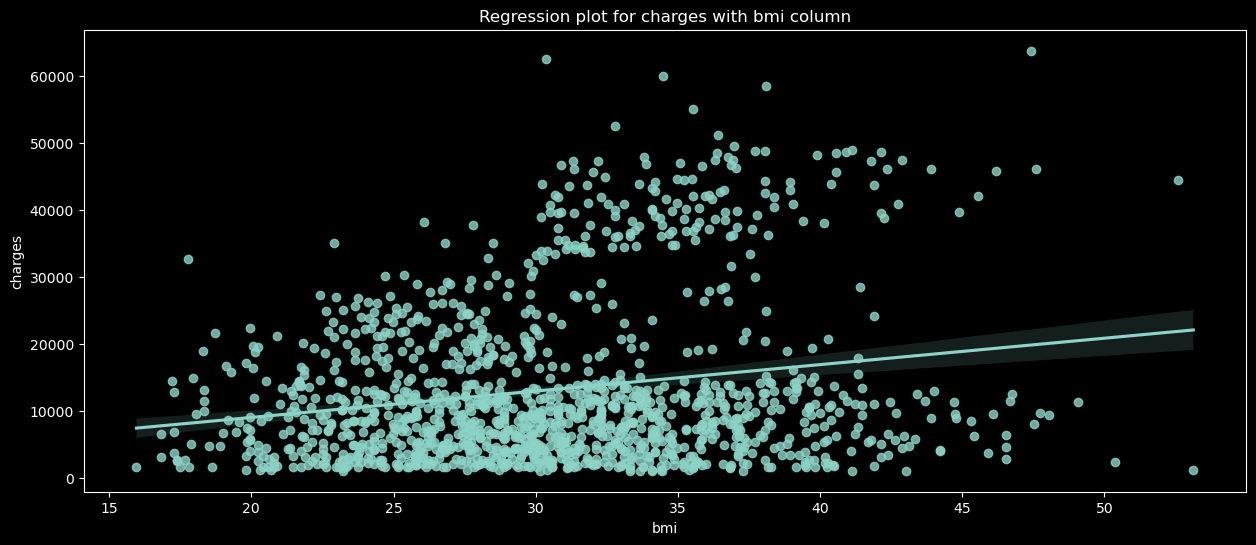

In [12]:
# Regression plot for charges with BMI column
reg_plot('bmi')

In [13]:
encodeded =pd.get_dummies(Data['region'])
print(encodeded)

      northeast  northwest  southeast  southwest
0             0          0          0          1
1             0          0          1          0
2             0          0          1          0
3             0          1          0          0
4             0          1          0          0
...         ...        ...        ...        ...
1333          0          1          0          0
1334          1          0          0          0
1335          0          0          1          0
1336          0          0          0          1
1337          0          1          0          0

[1338 rows x 4 columns]


In [14]:
Data=pd.read_csv("insurance.csv")
print(Data.head())
encodeded=pd.DataFrame(encodeded)
Data = Data.add(encodeded)
Data.head()

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


,age,bmi,charges,children,northeast,northwest,region,sex,smoker,southeast,southwest
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


d:\Autogluon\Autogluon\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
d:\Autogluon\Autogluon\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

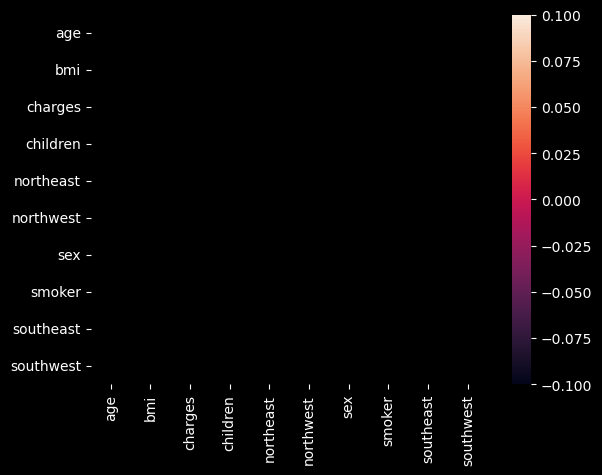

In [15]:
Data = Data + encodeded
Data.drop(['region'],axis = 1,inplace=True)
correlation = Data.corr()
sb.heatmap(correlation)